In [1]:
!gdown 1_Zor0AEbCDg29NJPNJH67tikJOWql8t6

'gdown' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
!gdown 1DhLwZhaCx2bxwiW-Y8oZX9iTey72lggn

'gdown' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score


In [4]:
df_train = pd.read_csv('train.csv')

In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_train.shape

(891, 12)

In [7]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df_test = pd.read_csv('test.csv')

In [10]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [12]:
df_test.shape

(418, 11)

In [13]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [14]:
# Checking for null values
print(df_train.isnull().sum())
print(df_test.isnull().sum())



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [15]:
# Fill null values
df_train['Age'].fillna(df_train['Age'].median(), inplace=True)
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)
df_test['Age'].fillna(df_test['Age'].median(), inplace=True)
df_test['Fare'].fillna(df_test['Fare'].median(), inplace=True)

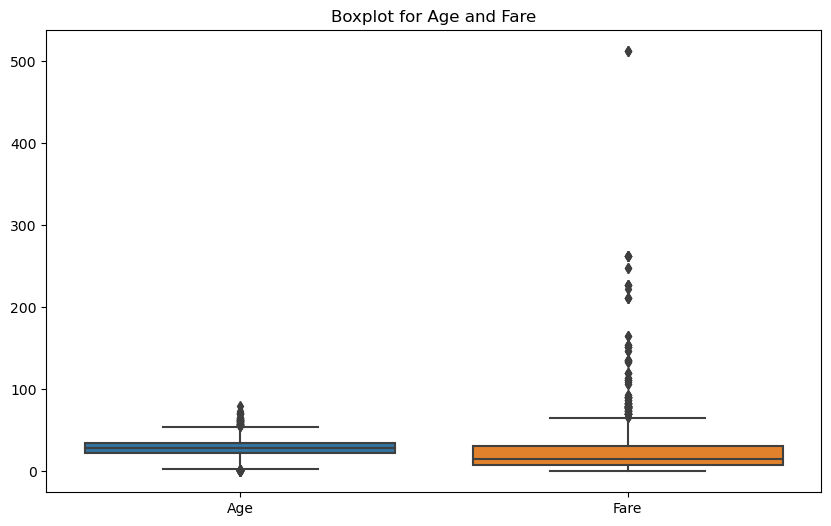

In [16]:
# Boxplot for outlier detection in the 'Age' and 'Fare' columns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_train[['Age', 'Fare']])
plt.title('Boxplot for Age and Fare')
plt.show()

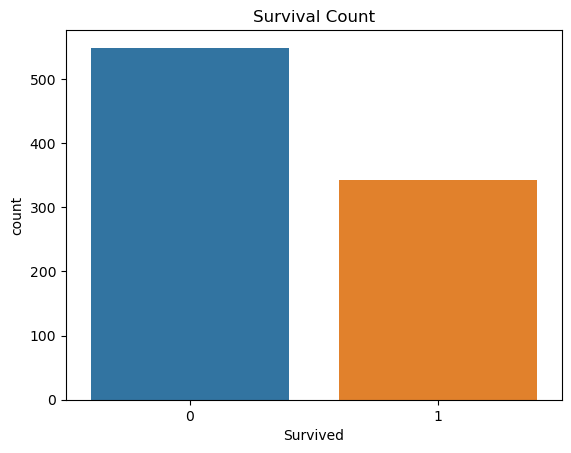

In [17]:
# Data Visualization with respect to the target variable 'Survived'
# Survival count
sns.countplot(x='Survived', data=df_train)
plt.title('Survival Count')
plt.show()

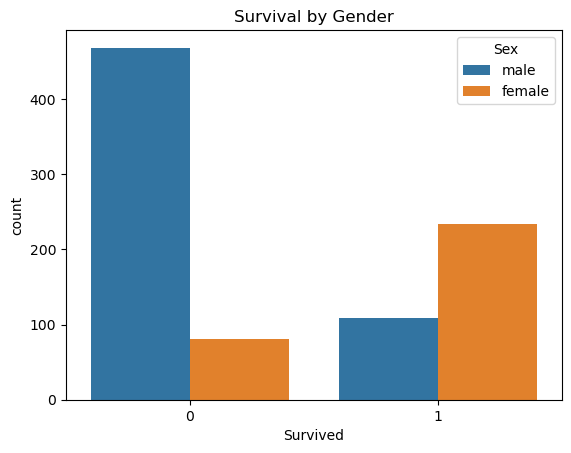

In [18]:
# Survival by Gender
sns.countplot(x='Survived', hue='Sex', data=df_train)
plt.title('Survival by Gender')
plt.show()

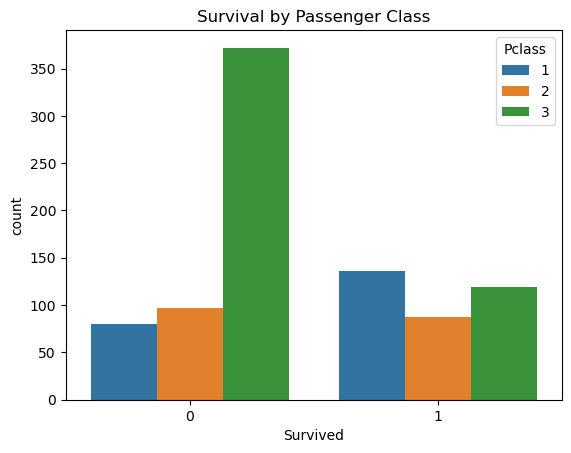

In [19]:
# Survival by Passenger Class
sns.countplot(x='Survived', hue='Pclass', data=df_train)
plt.title('Survival by Passenger Class')
plt.show()

In [20]:
# Feature Engineering
# Creating a FamilySize column from SibSp and Parch
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1


In [21]:
# Creating a Fare per Person column
df_train['FarePerPerson'] = df_train['Fare'] / df_train['FamilySize']
df_test['FarePerPerson'] = df_test['Fare'] / df_test['FamilySize']


In [22]:
# One-Hot Encoding
df_train = pd.get_dummies(df_train, columns=['Sex', 'Embarked', 'Pclass'])
df_test = pd.get_dummies(df_test, columns=['Sex', 'Embarked', 'Pclass'])

In [23]:
# Preparing data for modeling
X = df_train.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = df_train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [24]:
# Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Random Forest F1 Score:", f1_score(y_test, rf_pred))

Random Forest Accuracy: 0.8059701492537313
Random Forest F1 Score: 0.7475728155339806


In [25]:
# SVM Classifier
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("SVM F1 Score:", f1_score(y_test, svm_pred))

SVM Accuracy: 0.6119402985074627
SVM F1 Score: 0.1746031746031746


**SECOND IMPLEMENTATION**

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.pipeline import Pipeline


In [27]:
# Load the data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [28]:
# Fill missing values
df_train['Age'].fillna(df_train['Age'].median(), inplace=True)
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)
df_test['Age'].fillna(df_test['Age'].median(), inplace=True)
df_test['Fare'].fillna(df_test['Fare'].median(), inplace=True)

In [29]:
# Advanced Feature Engineering
df_train['IsAlone'] = (df_train['SibSp'] + df_train['Parch'] == 0).astype(int)
df_test['IsAlone'] = (df_test['SibSp'] + df_test['Parch'] == 0).astype(int)

In [30]:
# One-Hot Encoding
df_train = pd.get_dummies(df_train, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)
df_test = pd.get_dummies(df_test, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)

In [31]:
# Preparing data for modeling
X = df_train.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = df_train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
# Hyperparameter Tuning for Random Forest
rf = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_
rf_pred = best_rf.predict(X_test)

# SVM with Feature Scaling
pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(random_state=42))
])
param_grid_svm = {
    'svm__C': [0.1, 1, 10],
    'svm__kernel': ['rbf', 'linear']
}
grid_svm = GridSearchCV(pipeline_svm, param_grid_svm, cv=5, scoring='accuracy')
grid_svm.fit(X_train, y_train)
best_svm = grid_svm.best_estimator_
svm_pred = best_svm.predict(X_test)

# Print model performance
print("Optimized Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Optimized Random Forest F1 Score:", f1_score(y_test, rf_pred))
print("Optimized SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("Optimized SVM F1 Score:", f1_score(y_test, svm_pred))


Optimized Random Forest Accuracy: 0.8097014925373134
Optimized Random Forest F1 Score: 0.7384615384615384
Optimized SVM Accuracy: 0.8134328358208955
Optimized SVM F1 Score: 0.7395833333333333
